# Practice 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
n_elements = 100000
mean_ideal = 0
std_ideal  = 3
test_data = np.random.normal(mean_ideal, std_ideal, n_elements)
sample_number = np.linspace(1, n_elements, n_elements, endpoint=True)

In [3]:
mean_data = np.mean(test_data)
std_data = np.std(test_data)
print(f"Actual Mean: {mean_data}")
print(f"Actual Std: {std_data}")

Actual Mean: 0.0029006044228487944
Actual Std: 3.002702862884671


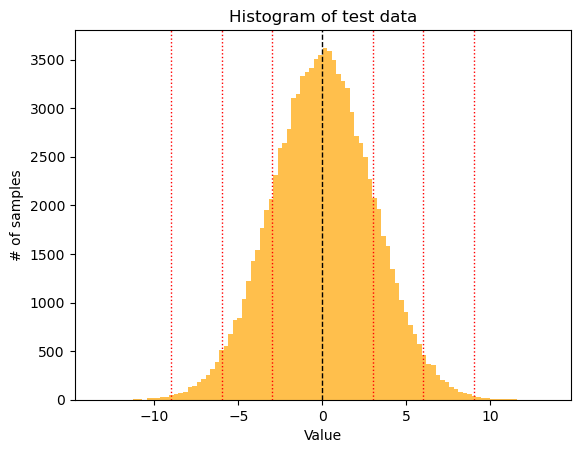

In [4]:
plt.hist(test_data, bins=100, color='orange', alpha=0.7)
plt.axvline(mean_data, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean_data + std_data, color='r', linestyle='dotted', linewidth=1)
plt.axvline(mean_data - std_data, color='r', linestyle='dotted', linewidth=1)
plt.axvline(mean_data + 2*std_data, color='r', linestyle='dotted', linewidth=1)
plt.axvline(mean_data - 2*std_data, color='r', linestyle='dotted', linewidth=1)
plt.axvline(mean_data + 3*std_data, color='r', linestyle='dotted', linewidth=1)
plt.axvline(mean_data - 3*std_data, color='r', linestyle='dotted', linewidth=1)
plt.title("Histogram of test data")
plt.xlabel("Value")
plt.ylabel("# of samples")
plt.savefig("./figures/practice_1_1_histogram.pdf", transparent=True, bbox_inches='tight')
plt.show()

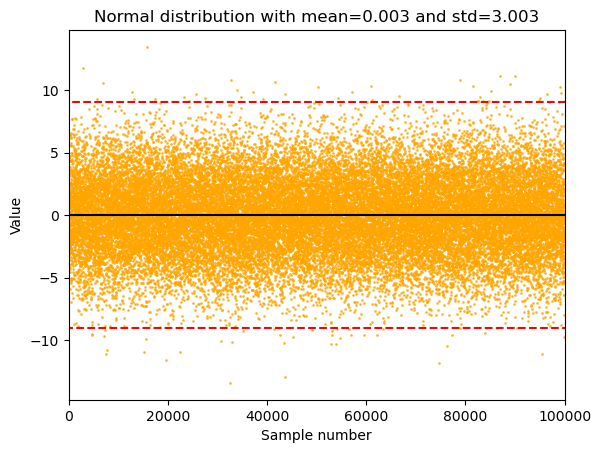

In [5]:
plt.scatter(sample_number[::3], test_data[::3], s=1, c='orange', alpha=0.7)
plt.plot(plt.xlim(), [np.mean(test_data), np.mean(test_data)], 'k-')
plt.plot(plt.xlim(), [np.mean(test_data) + 3 * np.std(test_data), np.mean(test_data) + 3 * np.std(test_data)],
          'r--')
plt.plot(plt.xlim(), [np.mean(test_data) - 3 * np.std(test_data), np.mean(test_data) - 3 * np.std(test_data)],
          'r--')
plt.xlim([0, n_elements])
plt.title(f'Normal distribution with mean={np.mean(test_data):.3f} and std={np.std(test_data):.3f}')
plt.xlabel("Sample number")
plt.ylabel("Value")
plt.savefig("./figures/practice_1_1_scatter.pdf", transparent=True, bbox_inches='tight')
plt.show()

In [6]:
tolerances = np.linspace(-4, 0, 100)
min_sample_sizes = []

for tolerance in tolerances:
    min_sample_size = None
    for i in range(1, n_elements + 1):
        sample = test_data[:i]
        sample_mean = np.mean(sample)
        sample_std = np.std(sample)
        
        if abs(sample_mean - mean_ideal) < 10**tolerance and abs(sample_std - std_ideal) < 10**tolerance:
            min_sample_size = i
            break
        
    min_sample_sizes.append(min_sample_size)

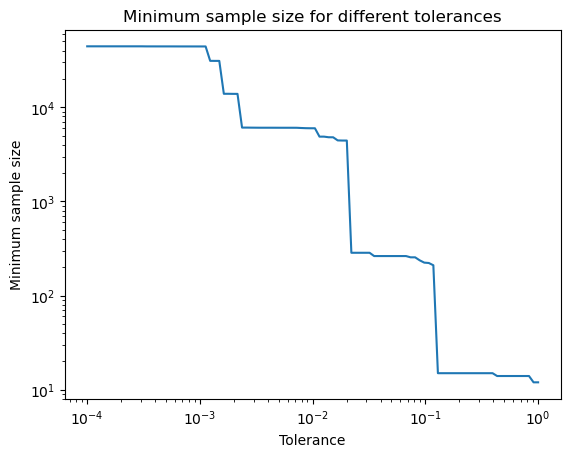

In [10]:
plt.plot(10**tolerances, min_sample_sizes)
plt.title("Minimum sample size for different tolerances")
plt.xlabel("Tolerance")
plt.ylabel("Minimum sample size")
plt.xscale("log")
plt.yscale("log")
plt.savefig("./figures/practice_1_1_tolerance.pdf", transparent=True, bbox_inches='tight')
plt.show()